In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
import matplotlib.pyplot as plt
from google.colab import files
import io

In [28]:
upload = files.upload()

Saving cleaned_all_phones.csv to cleaned_all_phones (2).csv


In [30]:
df = pd.read_csv(io.BytesIO(upload['cleaned_all_phones (2).csv']))
df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.000
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.000
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.000
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,2023-08-18,190.0,...,True,False,False,True,False,False,False,False,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,2023-08-23,190.0,...,True,False,False,True,False,False,False,False,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,2023-08-28,205.0,...,True,True,False,False,True,False,False,False,False,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,2023-08-28,205.0,...,True,True,False,False,True,False,False,False,False,470.000


# Memilih atribut x dan y

In [62]:
x = df[['battery', 'ram(GB)']]
y = df['weight(g)']

# Split menjadi test dan train

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Preprocessing dengan normalisasi

In [64]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Membangun model dengan sequential

In [65]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile model dengan binary_crossentropy accuracy

In [66]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Melatih model

In [67]:
history = model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.1)

Epoch 1/50
34/34 [==============================] - 1s 10ms/step - loss: -55.9211 - accuracy: 0.0000e+00 - val_loss: -139.5267 - val_accuracy: 0.0000e+00
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: -291.6486 - accuracy: 0.0000e+00 - val_loss: -444.9193 - val_accuracy: 0.0000e+00
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: -809.1225 - accuracy: 0.0000e+00 - val_loss: -1143.9991 - val_accuracy: 0.0000e+00
Epoch 4/50
34/34 [==============================] - 0s 4ms/step - loss: -1902.4369 - accuracy: 0.0000e+00 - val_loss: -2542.0728 - val_accuracy: 0.0000e+00
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: -3925.6619 - accuracy: 0.0000e+00 - val_loss: -4991.2539 - val_accuracy: 0.0000e+00
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: -7266.5337 - accuracy: 0.0000e+00 - val_loss: -8871.5352 - val_accuracy: 0.0000e+00
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - los

# Melatih model dengan accuracy

In [68]:
y_pred = (model.predict(x_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test,y_pred)

10/10 [==============================] - 0s 2ms/step


# Grafik accuracy

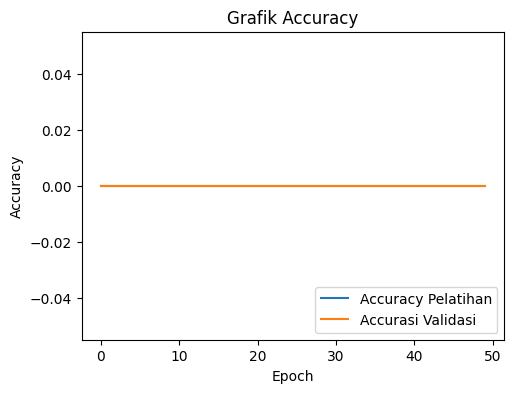

In [69]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy Pelatihan')
plt.plot(history.history['val_accuracy'], label='Accurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Grafik Accuracy')
plt.legend(loc='lower right')
plt.show()

## Grafik Loss

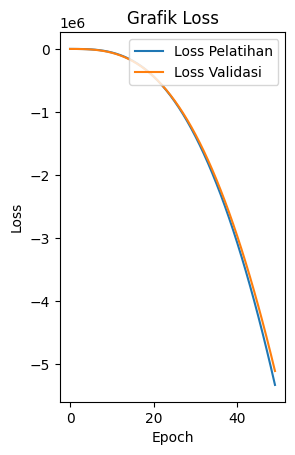

In [70]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Grafik Loss')
plt.show()

## Nilai akurasi model

In [71]:
print(accuracy)

0.0
